In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum
from scipy.io import loadmat, savemat 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\tkalra\AppData\Local\Continuum\anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [4]:
# 1. Read a time stacked image.. with vertical axis as distance and horizontal axis of time - currently done manually 
#matstack = loadmat('bispectral_FI_intervals.mat') #,'f_FI','fv_post_FI','fv_neg_FI')
#                  save('bispectral_FI_intervals.mat', 'f_neg_Su_FI_1st', 'f_post_Su_FI_2nd');
matstack=loadmat('bispectral_FI_intervals_GUV_new.mat') #, 'f','vspec_2nd_int')
#xx = matstack['f_FI']
#times=1/xx 
df=0.015625  ; # bandwidth

#freq = 1 #Hz
exposure = 1050  # seconds
times = np.arange(0, exposure, 1050/64)  # 1050/64 seconds

times=matstack['f']
counts= matstack['vspec_2nd_int']
print(times)
times=np.squeeze(times)
counts=np.squeeze(counts)
print(np.size(times))

#print(np.type(counts))
#Sv  = matstack['Sv_subset']

[[0.        ]
 [0.00761905]
 [0.0152381 ]
 [0.02285714]
 [0.03047619]
 [0.03809524]
 [0.04571429]
 [0.05333333]
 [0.06095238]
 [0.06857143]
 [0.07619048]
 [0.08380952]
 [0.09142857]
 [0.09904762]
 [0.10666667]
 [0.11428571]
 [0.12190476]
 [0.12952381]
 [0.13714286]
 [0.1447619 ]
 [0.15238095]
 [0.16      ]
 [0.16761905]
 [0.1752381 ]
 [0.18285714]
 [0.19047619]
 [0.19809524]
 [0.20571429]
 [0.21333333]
 [0.22095238]
 [0.22857143]
 [0.23619048]
 [0.24380952]
 [0.25142857]
 [0.25904762]
 [0.26666667]
 [0.27428571]
 [0.28190476]
 [0.28952381]
 [0.29714286]
 [0.3047619 ]
 [0.31238095]
 [0.32      ]
 [0.32761905]
 [0.3352381 ]
 [0.34285714]
 [0.35047619]
 [0.35809524]
 [0.36571429]
 [0.37333333]
 [0.38095238]
 [0.38857143]
 [0.39619048]
 [0.40380952]
 [0.41142857]
 [0.41904762]
 [0.42666667]
 [0.43428571]
 [0.44190476]
 [0.44952381]
 [0.45714286]
 [0.4647619 ]
 [0.47238095]
 [0.48      ]
 [0.48761905]
 [0.4952381 ]
 [0.50285714]
 [0.51047619]
 [0.51809524]
 [0.52571429]
 [0.53333333]
 [0.54

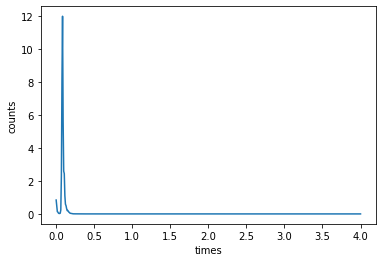

In [5]:

#times = np.arange(1,11)
#counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])


lc = lightcurve.Lightcurve(times,counts)
print(lc)
lc.plot(labels=['times','counts'])

window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')#lc.counts

In [6]:
window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')
#bs = Bispectrum(lc)


In [7]:
bs.freq


array([-65.625, -63.   , -60.375, -57.75 , -55.125, -52.5  , -49.875,
       -47.25 , -44.625, -42.   , -39.375, -36.75 , -34.125, -31.5  ,
       -28.875, -26.25 , -23.625, -21.   , -18.375, -15.75 , -13.125,
       -10.5  ,  -7.875,  -5.25 ,  -2.625,   0.   ,   2.625,   5.25 ,
         7.875,  10.5  ,  13.125,  15.75 ,  18.375,  21.   ,  23.625,
        26.25 ,  28.875,  31.5  ,  34.125,  36.75 ,  39.375,  42.   ,
        44.625,  47.25 ,  49.875,  52.5  ,  55.125,  57.75 ,  60.375,
        63.   ,  65.625])

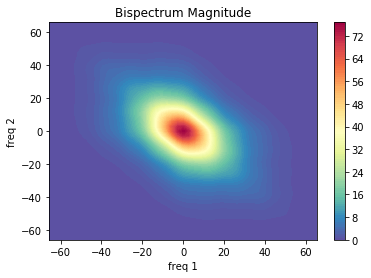

In [8]:
p = bs.plot_mag()
p.show()

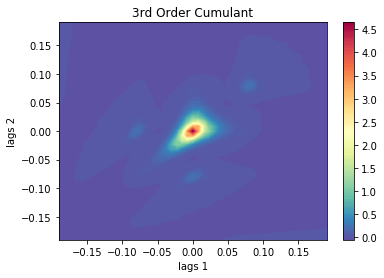

In [9]:
p = bs.plot_cum3()


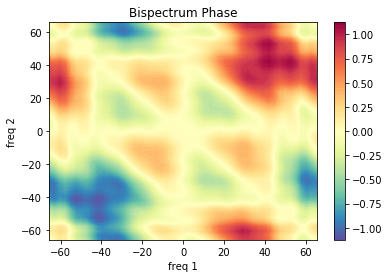

In [10]:
p = bs.plot_phase()
